In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

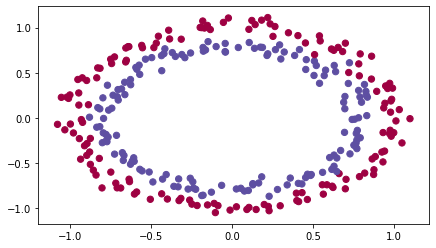

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# load image dataset : blue / red dots in circles
train_X, train_Y, test_X, test_Y = load_dataset()

In [3]:
def model(X, Y, learning_rate = 0.01, num_iterations = 15000, print_cost = True, initialization = 'he'):
    
    grads = {}
    costs = []    # to keep track of the loss
    m = X.shape[1]    # number of training examples
    layers_dims = [X.shape[0], 10, 5, 1]
    
    # intialize parameters dictionary
    if initialization == 'zeros':
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == 'random':
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == 'he':
        parameters = initialize_parameters_he(layers_dims)
        
    # loop for gradient descent
    for i in range(0, num_iterations):
        
        # forward propagation LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
        a3, cache = forward_propagation(X, parameters)
        
        # loss
        cost = compute_loss(a3, Y)
        
        # backward propagation
        grads = backward_propagation(X, Y, cache)
        
        # update parameters 
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # print loss every 500 iterations
        if print_cost and  i % 500 == 0:
            print("Cost after iteration {} : {}".format(i, cost))
            costs.append(cost)
        
    # plot loss
    plt.style.use('ggplot')
    plt.plot(costs)
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per 500)')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()
    
    return parameters

#### Zero Initialization ####

In [4]:
def initialize_parameters_zeros(layers_dims):
    
    parameters = {}
    L = (len(layers_dims))
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters["b" + str(l)] = np.zeros((layers_dims[l], 1))
        
    return parameters

Cost after iteration 0 : 0.6931471805599453
Cost after iteration 500 : 0.6931471805599453
Cost after iteration 1000 : 0.6931471805599453
Cost after iteration 1500 : 0.6931471805599453
Cost after iteration 2000 : 0.6931471805599453
Cost after iteration 2500 : 0.6931471805599453
Cost after iteration 3000 : 0.6931471805599453
Cost after iteration 3500 : 0.6931471805599453
Cost after iteration 4000 : 0.6931471805599453
Cost after iteration 4500 : 0.6931471805599453
Cost after iteration 5000 : 0.6931471805599453
Cost after iteration 5500 : 0.6931471805599453
Cost after iteration 6000 : 0.6931471805599453
Cost after iteration 6500 : 0.6931471805599453
Cost after iteration 7000 : 0.6931471805599453
Cost after iteration 7500 : 0.6931471805599453
Cost after iteration 8000 : 0.6931471805599453
Cost after iteration 8500 : 0.6931471805599453
Cost after iteration 9000 : 0.6931471805599453
Cost after iteration 9500 : 0.6931471805599453
Cost after iteration 10000 : 0.6931471805599453
Cost after itera

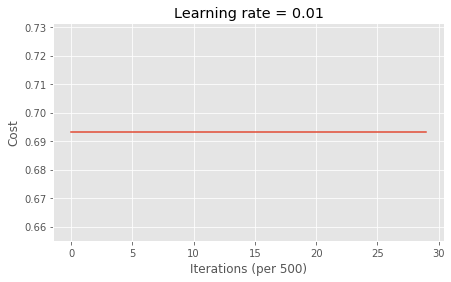

On the train set : 
Accuracy : 0.5
On the test set : 
Accuracy : 0.5


In [5]:
parameters = model(train_X, train_Y, initialization = 'zeros')
print('On the train set : ')
predictions_train = predict(train_X, train_Y, parameters)
print('On the test set : ')
predictions_test = predict(test_X, test_Y, parameters)

In [6]:
print("Predictions_train : {}".format(predictions_train))
print("Predictions_test : {}".format(predictions_test))

Predictions_train : [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
Predictions_test : [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


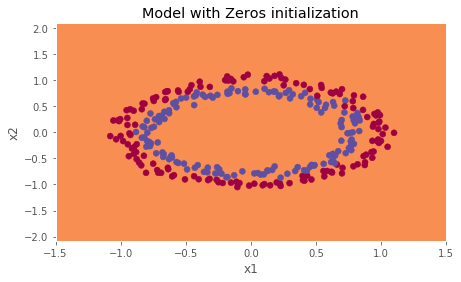

In [9]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
plot_decision_boundary(lambda x : predict_dec(parameters, x.T), train_X, train_Y.flatten())

The above model predicts 0 for every example. Initalizing the weights to zeros results in network failing to break symmetry which means that every neiron in each layer will learn the same thing that is the same as training a single 